In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from pathlib import Path
import sys

try:
    ROOT = Path().resolve().parents[1]
    assert (ROOT / "common").exists()
except AssertionError:
    ROOT = next(p for p in Path().resolve().parents if (p / "common").exists())

if str(ROOT) not in sys.path:
    sys.path.append(str(ROOT))

In [ ]:
#print(ROOT)

In [ ]:
from common import sensors as sn 
from common import subspace_methods as sm
from common import em_tools as em
from common import log_funcs as lf

In [ ]:
DIST_RATIO = 0.5

In [ ]:
Num_sensors1 = 25
Num_emitters1 = 1
sample_size1 = 12

failing_sensors1 = np.arange(5)
gap_ratio1 = 0.5 * np.ones_like(failing_sensors1, dtype=np.float32)

theta1_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta1_deg = np.rad2deg(theta1_rad) # Угловые координаты источников (DoA) в градусах
P1 = 0.5 * np.eye(Num_emitters1, dtype=np.float64) # Ковариация сигналов
Q1 = 8.1 * np.eye(Num_sensors1, dtype=np.float64) # Ковариация шумов
A1 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors1).reshape(-1,1) * 
             np.sin(theta1_rad))) # Матрица векторов направленности
# Генерация сигналов, шумов и наблюдений
S1 = sn.gss(Num_emitters1, sample_size1, P1)
N1 = sn.gss(Num_sensors1, sample_size1, Q1)
X1 = (A1 @ S1.T + N1.T).T
X1_with_mv = sn.MCAR(X1, failing_sensors1, gap_ratio1)
R1 = sn.initial_Cov(X1_with_mv)
MUSIC_theta1 = sm.MUSIC_DoA(R1, Num_emitters1)

In [ ]:
MUSIC_theta1

array([0.71558499])

In [ ]:
sn.SNR(A1, P1, Q1, metrics = 'avg', scale = 'linear')

np.float64(1.54320987654321)

In [ ]:
EM_theta1_rad, EM_P1, lhd_1, lhd_list1, angles_list1 = em.multistart_EM(X1_with_mv, 
                                                                        Num_emitters1, 
                                                                        Q=Q1,
                                                                        theta_guess=MUSIC_theta1, 
                                                                        num_of_starts=1, 
                                                                        max_iter=50, 
                                                                        rtol_params=1e-6,
                                                                        rtol_lkhd=1e-6,
                                                                        reg_coef=1e-5)

0-th start
theta=[0.71558499],P=[[1.18642836e-07-1.98523347e-24j]]
Inital likelihood = -870.4011155592349
Iteration=1
new_angles=[0.71558499]
likelihood is -870.4001651363839 on iteration 1.
Iteration=2
new_angles=[0.71171286]
likelihood is -870.399139252411 on iteration 2.
Iteration=3
new_angles=[0.70913647]
likelihood is -870.3980880874412 on iteration 3.
Iteration=4
new_angles=[0.70665813]
likelihood is -870.3970108960898 on iteration 4.
Iteration=5
new_angles=[0.70501341]
likelihood is -870.3959364885277 on iteration 5.
Iteration=6
new_angles=[0.70337099]
likelihood is -870.3948511125186 on iteration 6.
Iteration=7
new_angles=[0.70209443]
likelihood is -870.3937675200312 on iteration 7.
Iteration=8
new_angles=[0.70108114]
likelihood is -870.3926846889397 on iteration 8.
Iteration=9
new_angles=[0.70006872]
likelihood is -870.3915974478189 on iteration 9.
Iteration=10
new_angles=[0.69905715]
likelihood is -870.3905070636123 on iteration 10.
Iteration=11
new_angles=[0.6986977]
likelih

In [ ]:
EM_theta1_rad, EM_P1

(array([0.6966846]), array([[0.00067352+0.j]]))

In [ ]:
lf.incomplete_lkhd(X1_with_mv, EM_theta1_rad, EM_P1, Q1), lf.incomplete_lkhd(X1_with_mv, theta1_rad, P1, Q1)

(np.float64(-870.3301212678417), np.float64(-852.4011191641745))

In [ ]:
lhd_list1 = np.array(lhd_list1)
angles_list1 = np.rad2deg(np.array(angles_list1))
x1 = np.arange(len(angles_list1))

In [ ]:
Num_sensors2 = 25
Num_emitters2 = 1
sample_size2 = 11

failing_sensors2 = np.arange(8)
gap_ratio2 = 0.5 * np.ones_like(failing_sensors2, dtype=np.float32)

theta2_rad = np.array([0.7]) # Угловые координаты источников (DoA) в радианах
theta2_deg = np.rad2deg(theta2_rad) # Угловые координаты источников (DoA) в градусах
P2 = 0.5 * np.eye(Num_emitters2, dtype=np.float64) # Ковариация сигналов
Q2 = 6.1 * np.eye(Num_sensors2, dtype=np.float64) # Ковариация шумов
A2 = (np.exp(-2j * np.pi * DIST_RATIO * np.arange(Num_sensors2).reshape(-1,1) * 
             np.sin(theta2_rad))) # Матрица векторов направленности

# Генерация сигналов, шумов и наблюдений
S2 = sn.gss(Num_emitters2, sample_size2, P2)
N2 = sn.gss(Num_sensors2, sample_size2, Q2)
X2 = (A2 @ S2.T + N2.T).T
X2_with_mv = sn.MCAR(X2, failing_sensors2, gap_ratio2)
R2 = sn.initial_Cov(X2_with_mv)
MUSIC_theta2 = sm.MUSIC_DoA(R2, Num_emitters2)

In [ ]:
MUSIC_theta2

array([0.72431164])

In [ ]:
sn.SNR(A2, P2, Q2, metrics = 'avg', scale = 'linear')

np.float64(2.0491803278688523)

In [ ]:
EM_theta2_rad, EM_P2, lhd_2, lhd_list2, angles_list2 = em.multistart_EM(X2_with_mv, 
                                                                        Num_emitters2, 
                                                                        Q=Q2,
                                                                        theta_guess=MUSIC_theta2, 
                                                                        num_of_starts=1, 
                                                                        max_iter=50, 
                                                                        rtol_params=1e-6,
                                                                        rtol_lkhd=1e-6,
                                                                        reg_coef=1e-5)

0-th start
theta=[0.72431164],P=[[7.5917774e-08+4.13590306e-24j]]
Inital likelihood = -689.5792611594288
Iteration=1
new_angles=[0.72431164]
likelihood is -689.5782937401038 on iteration 1.
Iteration=2
new_angles=[0.72040993]
likelihood is -689.5772252639199 on iteration 2.
Iteration=3
new_angles=[0.71652154]
likelihood is -689.5760776006922 on iteration 3.
Iteration=4
new_angles=[0.71393442]
likelihood is -689.5749187744253 on iteration 4.
Iteration=5
new_angles=[0.7113531]
likelihood is -689.5737298739435 on iteration 5.
Iteration=6
new_angles=[0.70970176]
likelihood is -689.5725545524713 on iteration 6.
Iteration=7
new_angles=[0.70805275]
likelihood is -689.571366624821 on iteration 7.
Iteration=8
new_angles=[0.70676788]
likelihood is -689.5701820964018 on iteration 8.
Iteration=9
new_angles=[0.70575057]
likelihood is -689.5689985948172 on iteration 9.
Iteration=10
new_angles=[0.70473413]
likelihood is -689.56780832604 on iteration 10.
Iteration=11
new_angles=[0.70424803]
likelihood

In [ ]:
EM_theta2_rad, EM_P2

(array([0.70124648]), array([[0.00081498+0.j]]))

In [ ]:
lf.incomplete_lkhd(X2_with_mv, EM_theta2_rad, EM_P2, Q2), lf.incomplete_lkhd(X2_with_mv, theta2_rad, P2, Q2)

(np.float64(-689.4865431565711), np.float64(-673.6467390084401))

In [ ]:
lhd_list2 = np.array(lhd_list2)
angles_list2 = np.rad2deg(np.array(angles_list2))
x2 = np.arange(len(angles_list2))

In [ ]:
x_grid = np.arange(1,50,5)

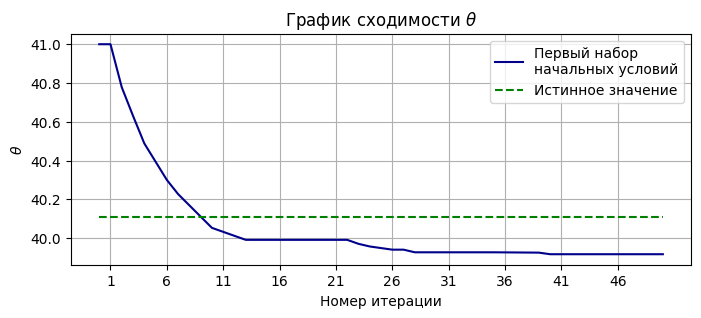

In [ ]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x1, angles_list1,color='darkblue', label=f'Первый набор\nначальных условий')
plt.plot(x1, np.tile(theta1_deg, len(angles_list1)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

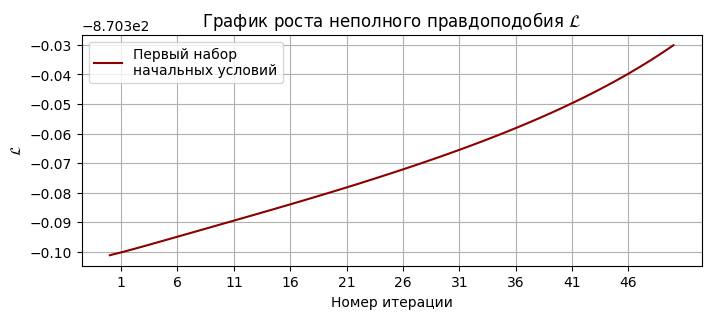

In [ ]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x1, lhd_list1, color='darkred', label=f'Первый набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

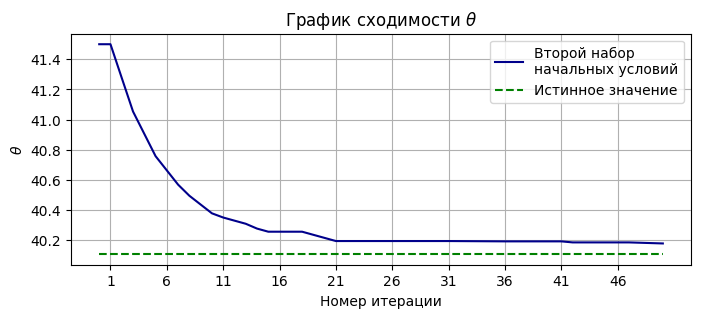

In [ ]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График сходимости} \,\,\theta$')
plt.plot(x2, angles_list2,color='darkblue', label=f'Второй набор\nначальных условий')
plt.plot(x2, np.tile(theta2_deg, len(angles_list2)), color='green', label='Истинное значение', linestyle='--')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\theta$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()

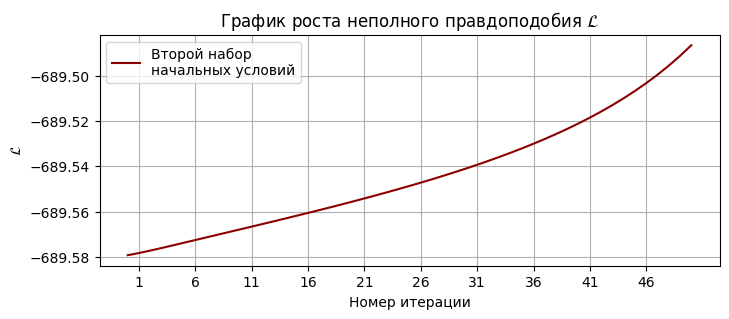

In [ ]:
plt.figure(figsize=(8, 3))
plt.title(r'$\text{График роста неполного правдоподобия} \,\,\mathcal{L}$')
plt.plot(x2, lhd_list2,color='darkred', label=f'Второй набор\nначальных условий')
plt.xlabel('Номер итерации') 
plt.ylabel(r'$\mathcal{L}$')
plt.xticks(x_grid)
plt.legend()
plt.grid()
plt.show()